In [ ]:
from IPython.display import HTML

# CSI4106 - Introduction to Artificial Intelligence
<h1 style ="front-size:3rem;color:red;">Project 1 - Credit Score Classifier</h1>
<h3 style ="front-size:1rem;color:black;">Author: Doga Uras</h3>
_______________________________________________________________________________________________________________________________

## Python update

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.9
!pip install sklearn
!pip install datasist

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [96.6 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,467 kB]
Get:14 

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from datasist.structdata import detect_outliers
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
import warnings 
warnings.filterwarnings("ignore")

## Problem Statement ##
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task ###
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

Kaggle Link to the Dataset Used: https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification?resource=download

## 1.Understanding the Classification Task of our Dataset
- In order to build a good model for the task in hand, it is essential to understand the type of classification that will be used to be able to use classifiers that best optimizes the process.

### 1.a Classification
- In this case, we try to classify credit scores under 'Poor', 'Standard', and 'Good' categories. This is a type of multi-class classification as we have 3 different classes a datapoint can be classified under.

### 1.b Goal

- The goal is to classify a person's credit score based on different variables that impact an individual's credit score. These are called 'features' and our models will try to learn the weights of each of these selected features to best predict one's credit score.

- At the end of the learning phase, of each different model, we will test our model's predictions against the expected values of credit scores that have 'Poor', 'Standard', and 'Good' as their values as mentioned earlier. 

- The finance companies may use these models to study the impact of the features affecting credit scores, evaluate which credit score ranges are most eligible for certain bank loans. Individuals may also use the model to see how their credit score might change based on the various features and evaluate whether they fall under a 'safe' range for a line of credit from the bank.

## 2.Analysis of the Dataset


### 2.1 Introduction to the Data
- ID: Unique identificater of an entry

- Customer_ID: Unique identifiacter of a person

- Month: Month of the year

- Name: Name of a person

- Age: Age of the person

- SSN: Social security number of a person

- Occupation: Occupation of the person

- Annual_Income: Annual income of the person

- Monthly_Inhand_Salary: Monthly base salary of a person

- Num_Bank_Accounts: Number of bank accounts owned by a person

- Num_Credit_Card: Number of other credit cards owned by a person

- Interest_Rate: Interest rate on credit card

- Num_of_Loan: Number of loans taken from the bank

- Type_of_Loan: Types of loan(s) taken by a person

- Delay_from_due_date: Average number of days delayed from the payment date

- Num_of_Delayed_Payment: Average number of payments delayed by a person

- Changed_Credit_Limit: Percentage change in credit card limit

- Num_Credit_Inquiries: Number of credit card inquiries

- Credit_Mix: Classification of the mix of credits

- Outstanding_Debt: Remaining debt to be paid (in USD)

- Credit_Utilization_Ratio: Utilization ratio of credit card

- Credit_History_Age: Age of credit history of the person

- Payment_of_Min_Amount: Whether only the minimum amount was paid by the person

- Total_EMI_per_month: Monthly EMI payments (in USD)

- Amount_invested_monthly:Monthly amount invested by the customer (in USD)

- Payment_Behaviour: Payment behavior of the customer (in USD)

- Monthly_Balance: Monthly balance amount of the customer (in USD)

- Credit_Score: Represents the bracket of the credit score (Poor, Standard, Good)

### 2.2 Data Exploration

#### 2.2.1 Dataset Information

In [ ]:
# Load dataset
url = 'https://drive.google.com/file/d/14kqyQBLqVzks_sFJN1MFDrw0_uu21WL6/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
credit_score = pd.read_csv(path)

#encode output labels
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}
data = credit_score.drop(["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Credit_Score"], axis=1)
target = credit_score["Credit_Score"].map(m)

In [ ]:
# #of rows x #of columns
credit_score.shape

(100000, 28)

In [ ]:
#Display the first entries in the dataframe
credit_score.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
#Display the datatype for each feature 
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
#Look at the missing data, if exists
missing_data = credit_score.isnull()
missing_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3.Exploratory Data Analysis (EDA) & Feature Engineering

### General Statistics

In [ ]:
# General statistcs (min,mean,max etc.)
credit_score.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Monthly Transaction Data

[Text(0.5, 1.0, 'Monthly Transaction Distribution')]

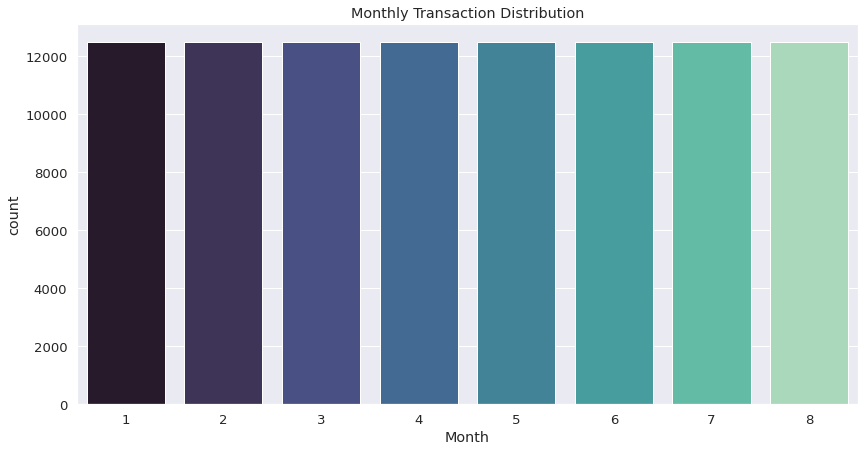

In [ ]:
import seaborn as sns
# Taken from https://seaborn.pydata.org/tutorial/aesthetics.html
# Standard figure size for all plots
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) 
sns.countplot(credit_score['Month'],palette='mako').set(title = 'Monthly Transaction Distribution')

Above, we see the distribution of the transactions amongst different months, it does seem to be conistent every given month.

###1 Transaction Relevant to Age Groups

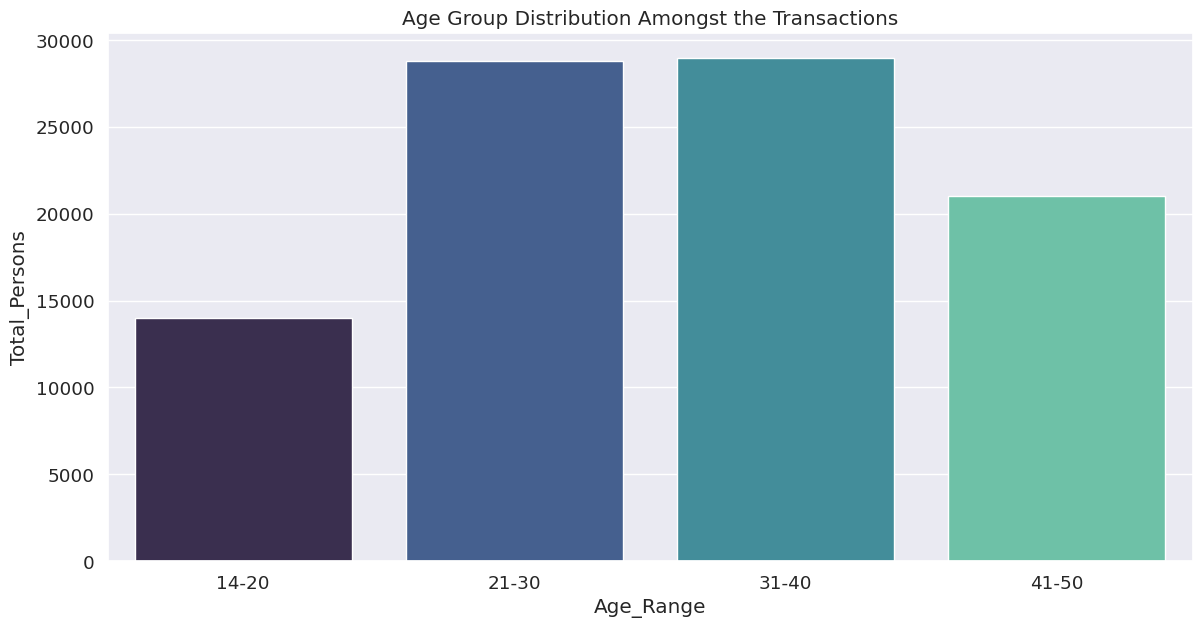

In [ ]:
# Taken from https://www.kaggle.com/code/mohammadsohal/analyzing-credit-score-data?scriptVersionId=109198946&cellId=31
age = {} #dictionary
x = 0
minv = int(min(credit_score['Age']))
maxv = int(max(credit_score['Age']))
distinct_ages = credit_score['Age'].value_counts()
for i in range(minv,maxv):
    x += distinct_ages[i]
    if i == 20:
        age['14-20'] = x
        x = 0
    elif i == 30:
        age['21-30'] = x
        x = 0
    elif i == 40:
        age['31-40'] = x
        x = 0
    elif i == 50:
        age['41-50'] = x
        x = 0
    elif i == 56:
        age['51-56'] = x
age_groups = pd.DataFrame({'Age_Range': age.keys(), 'Total_Persons': age.values()})

plt.figure(figsize=(14,7), dpi=100)
plt.title('Age Group Distribution Amongst the Transactions')
sns.barplot(data=age_groups, x='Age_Range', y='Total_Persons', palette='mako')
plt.show()

Above graph shows that the people aged 21-30 and 31-30 make more transactions than other age groups.

### Income Distribution Amongst Occupation

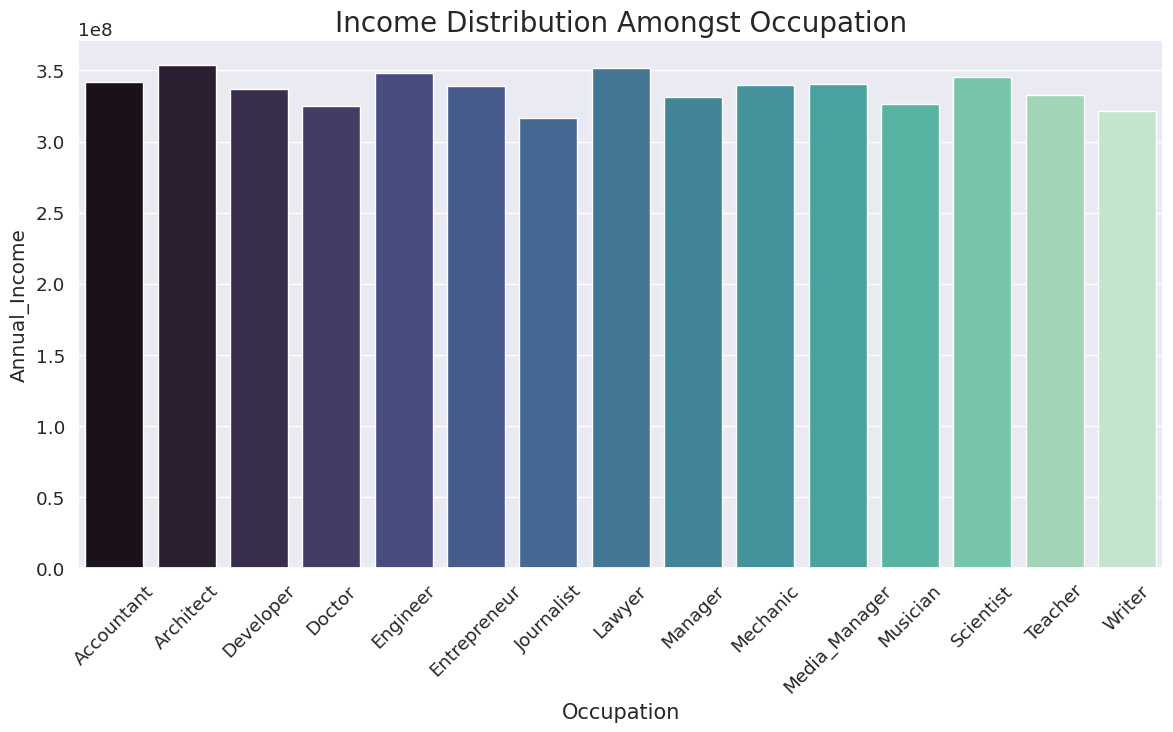

In [ ]:
# Taken from https://www.kaggle.com/code/mohammadsohal/analyzing-credit-score-data?scriptVersionId=109198946&cellId=38
plt.figure(figsize=(14,7), dpi=100)
plt.xticks(rotation=45)
plt.title('Income Distribution Amongst Occupation',size=20)
income_distribution = credit_score[['Occupation', 'Annual_Income']].groupby('Occupation').sum().reset_index()
sns.barplot(data=income_distribution, x='Occupation', y='Annual_Income',palette='mako')
plt.xlabel('Occupation',size=15)
plt.show()

### Age Range vs Credit Score

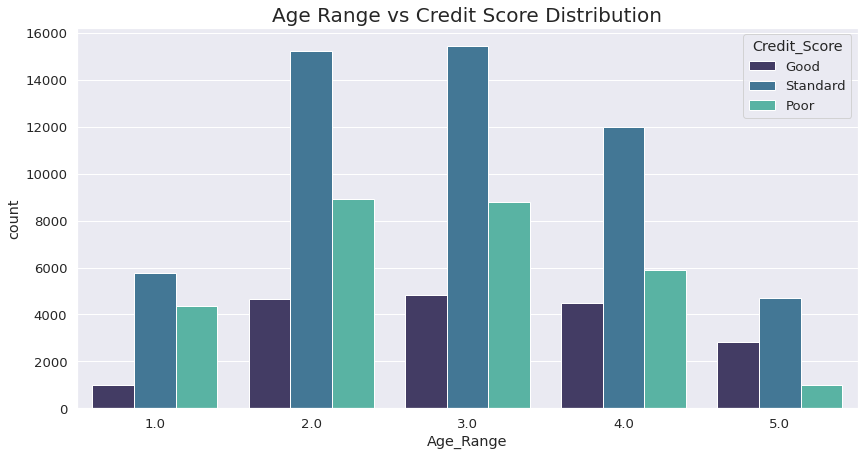

In [ ]:
age_range = [i // 10 for i in credit_score["Age"]] #this line is taken from https://colab.research.google.com/drive/14o0S-2Pp9RpovgI9TdkgbkWl8W18TVF3#scrollTo=ZMtuwiFSbmnA&line=1&uniqifier=1
credit_score["Age_Range"] = age_range
plt.figure(figsize=(14,7))
sns.countplot(x="Age_Range", hue="Credit_Score", data=credit_score, palette='mako')
plt.title("Age Range vs Credit Score Distribution", fontsize=20)
plt.show()
credit_score = credit_score.iloc[: , :-1]

We can see in the above graph that:

*   People in the age range of 1(14-20) and 4(41-50) tend to have poorer credit scores.

*   The majority of people have 'Standard' class credit scores.



### Occupation vs Credit Score

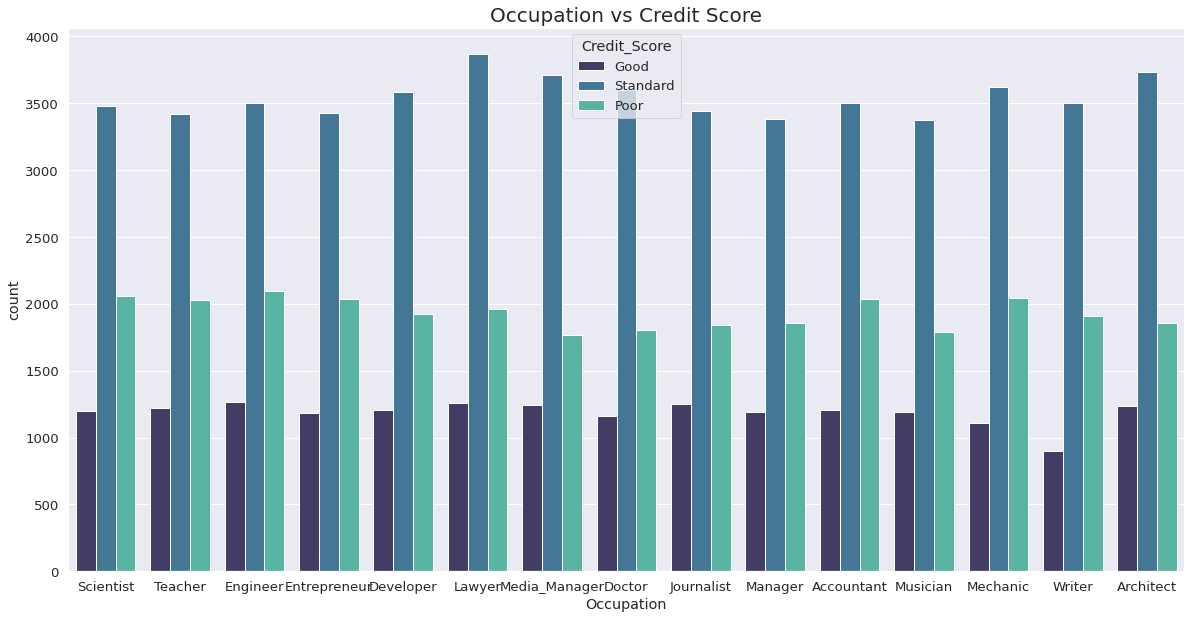

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="Occupation", hue="Credit_Score", data=credit_score, palette='mako')
plt.title("Occupation vs Credit Score", fontsize=20)
plt.show()

We can see in the above graph that the credit scores are mostly uniformly distributed amongst occupations.

### Payment of Min Amount vs Credit Score

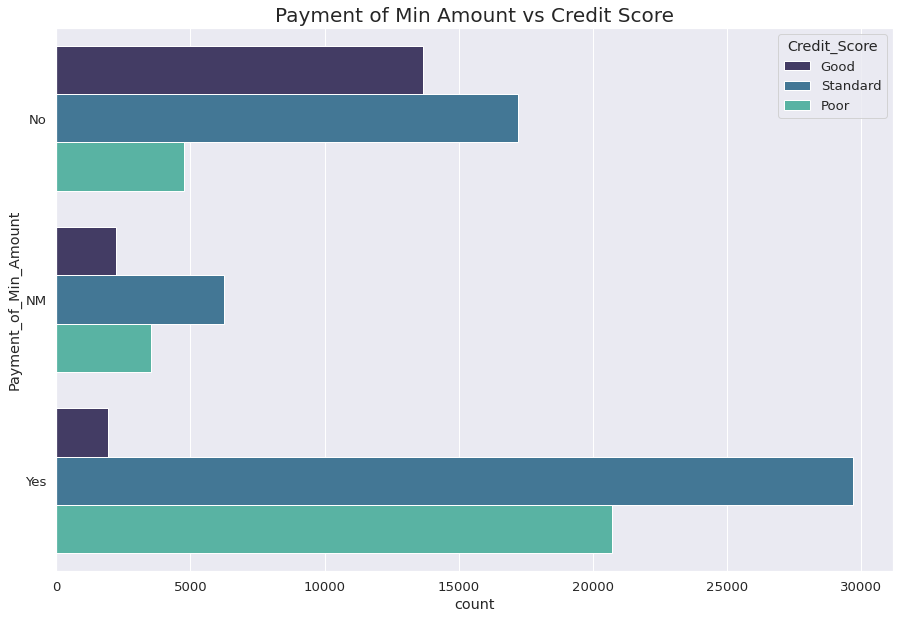

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=credit_score, y="Payment_of_Min_Amount", hue="Credit_Score", palette='mako')
plt.title("Payment of Min Amount vs Credit Score", fontsize=20)
plt.show()

We see in the above graph that having payment of minimum amount has a negative effect on the credit score since int the 'Yes' row, the poor and standard labels are dominant.

### Monthly Inhand Salary vs Credit Score

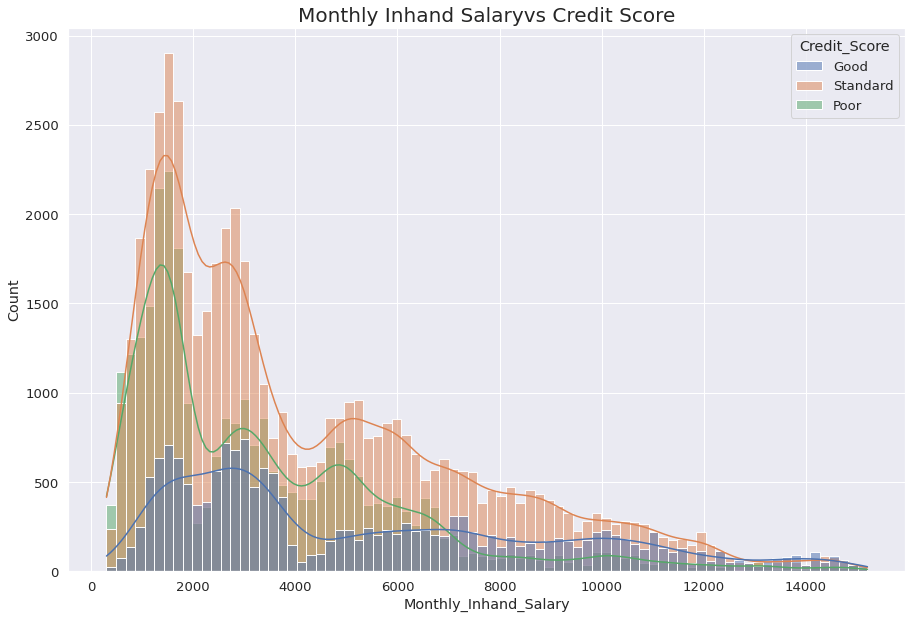

In [ ]:
# Taken from https://www.kaggle.com/code/aieducation/can-i-borrow-money-from-the-banks-eda-lgbm?scriptVersionId=108537516&cellId=59
plt.figure(figsize=(15,10))
sns.histplot(data=credit_score, x="Monthly_Inhand_Salary", kde=True, hue="Credit_Score")
plt.title("Monthly Inhand Salaryvs Credit Score", fontsize=20)
plt.show()

- From the above graph, we can see the distribution of monthly inhand salary as well as its effect on the credit score. The majority of the account holders have monthly inhand salary of < 4000$ and that is also where the standard and poor credit score labels are dominant. A
- As the monthly inhand salary increases, we see a decrease in the poor and standard credit scores.

### Outstanding Debt vs Credit Score

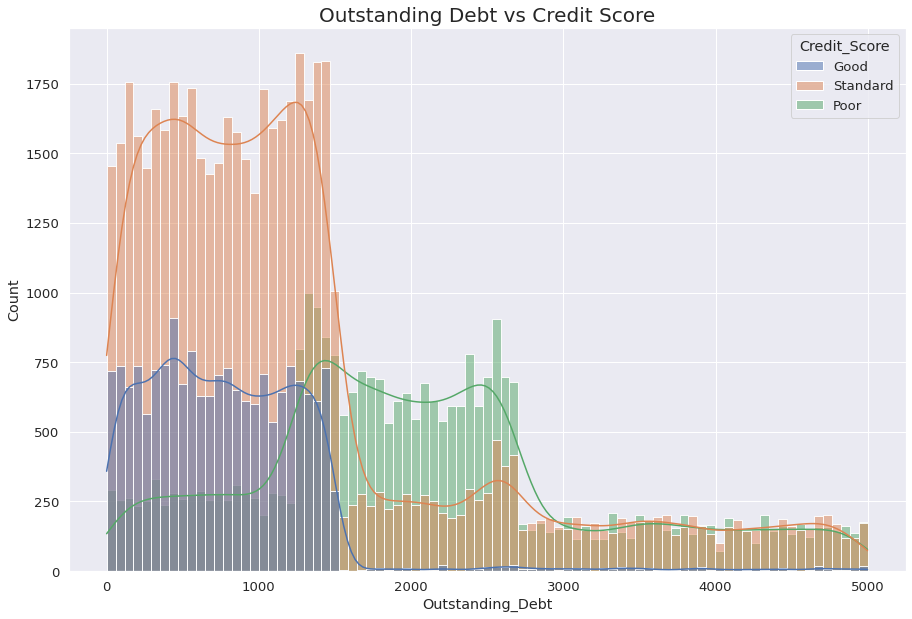

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=credit_score, x="Outstanding_Debt", kde = True, hue="Credit_Score")
plt.title("Outstanding Debt vs Credit Score", fontsize=20)
plt.show()

- Outstanding debt has a negative effect on credit scores as we see in the graph above. As the outstanding debt increases the number of poor credit scores also increases (it peaks drastically between 1000$-2000$ of outstanding debt).
- Similarly, the number of good and standard credit scores is high when outstanding debt is low.

### Annual Income vs Credit Score

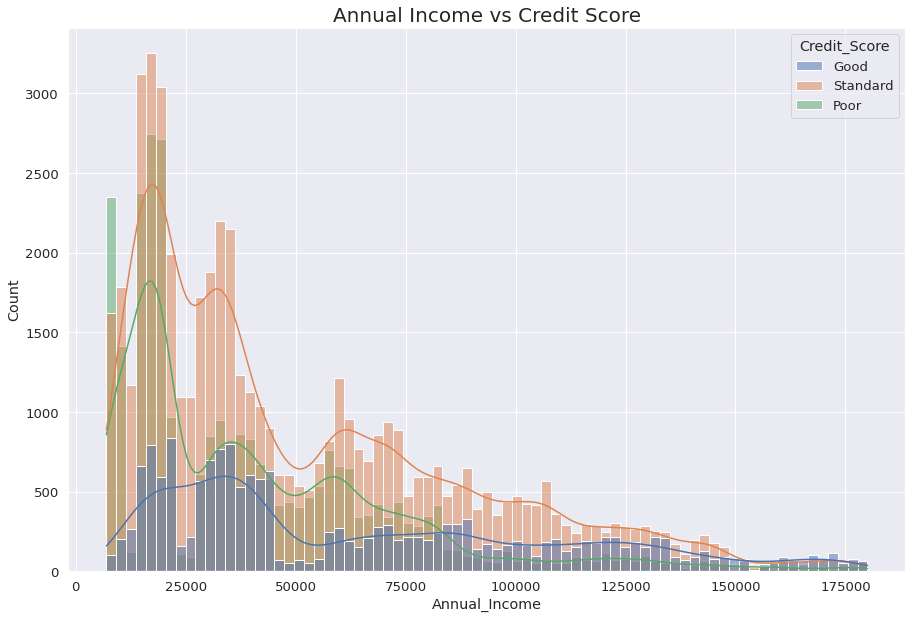

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=credit_score, x="Annual_Income", kde=True, hue="Credit_Score")
plt.title("Annual Income vs Credit Score", fontsize=20)
plt.show()

- Annual income may not be contributing to the credit score too much as we see that even with small annual income, the count of credit score labels are distributed fairly evenly.

### Changed Credit Limit vs Credit Score

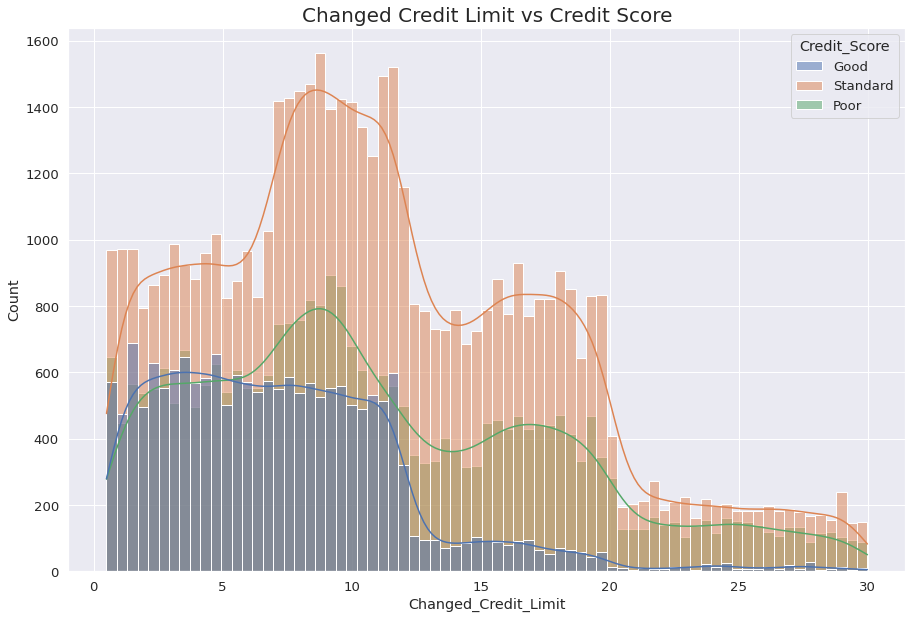

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=credit_score, x="Changed_Credit_Limit", kde=True, hue="Credit_Score")
plt.title("Changed Credit Limit vs Credit Score", fontsize=20)
plt.show()

- There are more good credit scores when changed credit limit number is < 15.
- The reason for the decreasing curves (from ~17 and on in x-axis) is due to the fact that there are only a few data points in the dataset that has high numbers of changed credit limit. But we can still see that those few datapoints are classified as poor or standard credit scores. 

### Monthly Balance vs Credit Score

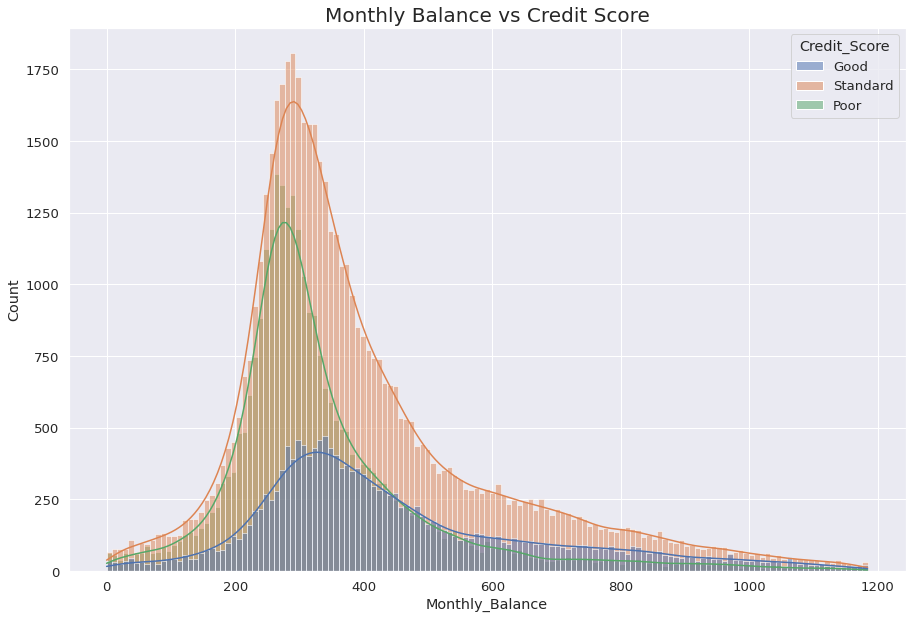

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=credit_score, x="Monthly_Balance", kde = True, hue="Credit_Score")
plt.title("Monthly Balance vs Credit Score", fontsize=20)
plt.show()

### Credit Utilization Ratio vs Credit Score

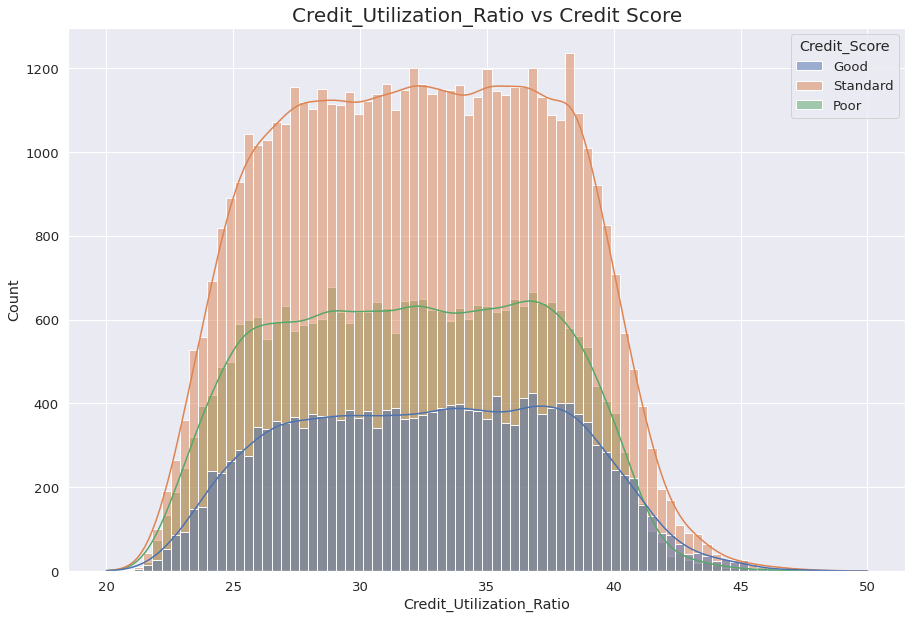

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Credit_Utilization_Ratio", hue="Credit_Score", kde= True, data=credit_score)
plt.title("Credit_Utilization_Ratio vs Credit Score", fontsize=20)
plt.show()

- From the above graph, we can predict that the credit utilization ratio feature will not have a big weight on the target credit score.
- This is because the same range of credit utilization ratio cause spike in the number of labels.

### Num Credit Inquiries vs Credit Score

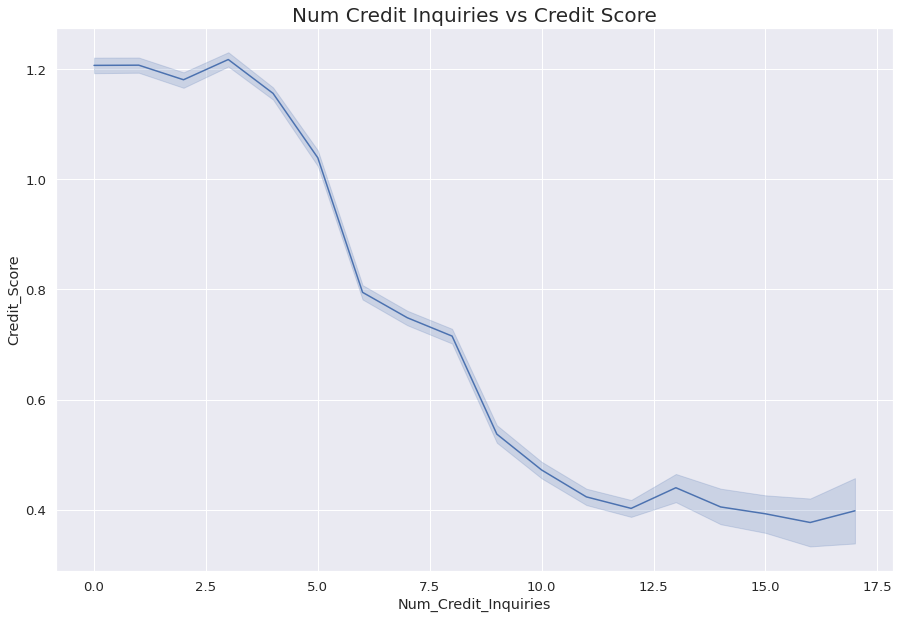

In [ ]:
# Taken from https://www.kaggle.com/code/aieducation/can-i-borrow-money-from-the-banks-eda-lgbm?scriptVersionId=108537516&cellId=49
plt.figure(figsize=(15,10))
temp = credit_score["Credit_Score"]
credit_score["Credit_Score"] = credit_score["Credit_Score"].map(m)
sns.lineplot(x="Num_Credit_Inquiries", y="Credit_Score", data=credit_score)
plt.title("Num Credit Inquiries vs Credit Score", fontsize=20)
plt.show()
credit_score["Credit_Score"] = temp

We see that as the number of credit inquiries increases, the credit score decreases drastically.

Note the mapping of the credit score here: 
*   'Poor': 0
*   'Standard': 1
*   'Good': 2






### Delay from Due Date vs Credit Score

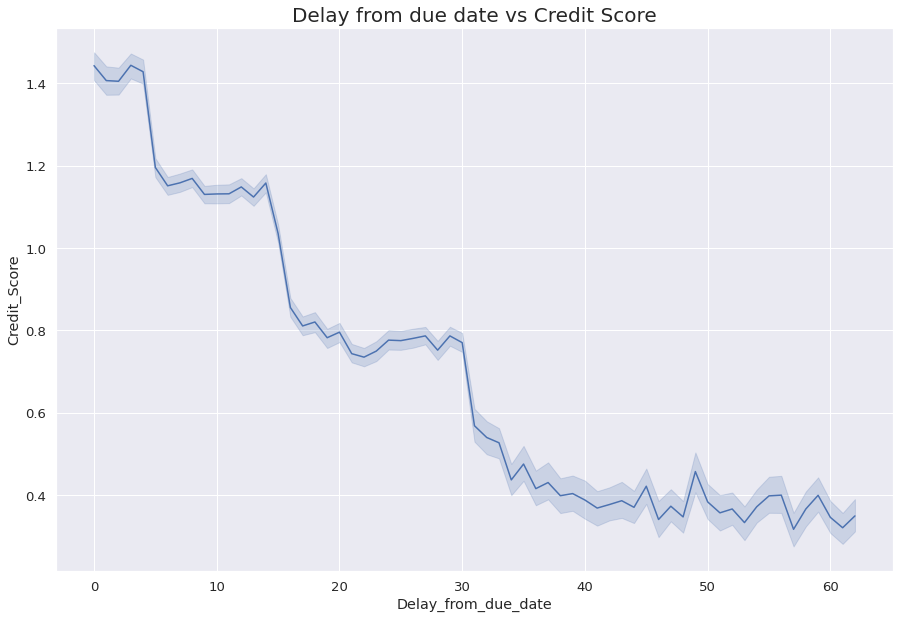

In [ ]:
plt.figure(figsize=(15,10))
temp = credit_score["Credit_Score"]
credit_score["Credit_Score"] = credit_score["Credit_Score"].map(m)
sns.lineplot(x="Delay_from_due_date", y="Credit_Score", data=credit_score)
plt.title("Delay from due date vs Credit Score", fontsize=20)
plt.show()
credit_score["Credit_Score"] = temp

Similarly here, as the delay from the due date increases, the credit score decreases drastically.

### Num of Loan vs Credit Score

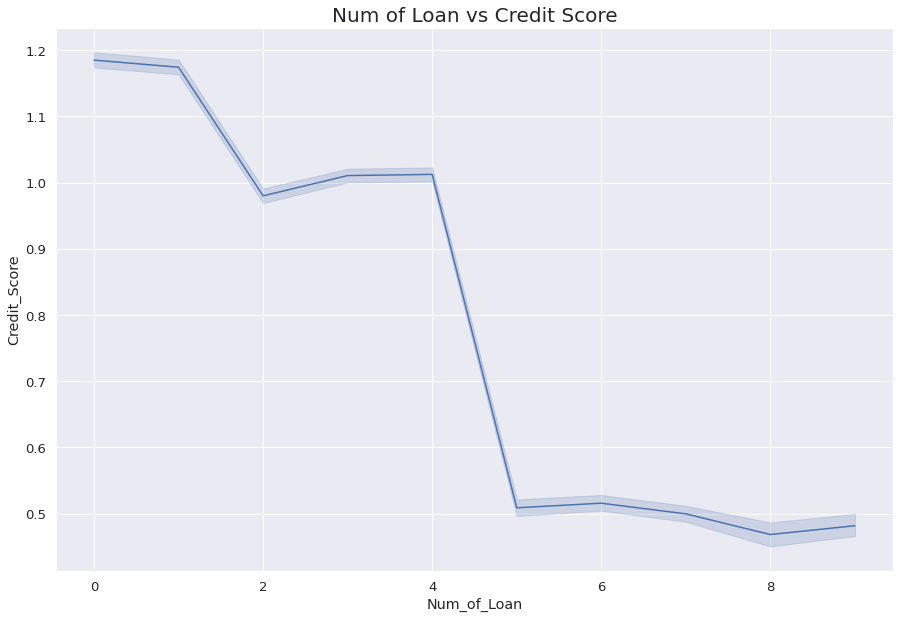

In [ ]:
plt.figure(figsize=(15,10))
temp = credit_score["Credit_Score"]
credit_score["Credit_Score"] = credit_score["Credit_Score"].map(m)
sns.lineplot(x="Num_of_Loan", y="Credit_Score", data=credit_score)
plt.title("Num of Loan vs Credit Score", fontsize=20)
plt.show()
credit_score["Credit_Score"] = temp

We see that num of loan is reversely proportional to the credit score which means that as a person takes out more loans, their credit score decreases.

It is also interesting to note here that the credit score is considerably steady when 2 <= Num_of_Loan <= 4

**Conclusion**: After studying the nature of each feature and the relationship between the features and the target credit-score, we decided not to take into account the following features:
- ID, Customer_ID, Name, SSN as they are only used for identificators for the transactions and do not have an impact on the target
- Type_of_Loan field as the column contains multiple types in a single row, and the number of loans is what actually impacts the credit score and not the type of the loan. 

Common Ressources

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data["Occupation"] =le.fit_transform(credit_score["Occupation"])
data["Payment_Behaviour"]=le.fit_transform(credit_score["Payment_Behaviour"])
data["Credit_Mix"] = le.fit_transform(credit_score["Credit_Mix"])
data["Payment_of_Min_Amount"] = le.fit_transform(credit_score["Payment_of_Min_Amount"])

## over sampling the data
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
data, target = rus.fit_resample(data, target)


##  4.Encode the features 



### 4.a Encoding and Transformation

#### Encoding:

- Features that are not in numerical format should be transformed to numerical values before being used.
    - String values that we have in our dataset are being encoded into positive integers. Each unique string in a column is given a unique integer. unique integers start from 0 and continue with increments of 1 until all unique values present in column have their unique integer.

#### Discretization:

- Naive_Bayes Classifier requires discrete feautres for prediction
    - **Kbins discretizer** is used to convert continuous features to discrete feautures
    Kbins groups the contiuous features according to the minimum and the maximum values present in a selected column by giving unique positive integers to each group.
    
    - **Parameters used are**: <br>
        *n_bins* = determines number of desired groups to be created from a given column.<br><br>
        *encode* = encoded value type ('ordinal' = positive integers).<br><br>
        *strategy* = encoding method
    According to strategy chosen KBins can group continuous values into bins that are:

      - **('uniform')**
          - Equal distance to each other. For instance, considering a scenario where column = [15.35, 300, 438.15, 500, 201.16, 370.98] min = 10.43, max = 500, number of groups desired = 5.
          - KBins creates 5 groups numbered from 0 to 4. Each group has a staring value and an ending value in order to encapsulate the a group of values.
          - In this case first group (with unique number 0) corresponds to (10.43 : 108.344], (with unique number 0) corresponds to (108.344 : 206.258] and so on until the last group (with unique integer 4) which will correspond to (402.86 : 500).
        dataset will be encoded as such[15.35, 300, 438.15, 500, 201.16, 370.98] -> [0, 2, 4, 1, 3] and assigns each value in the dataset to group by evaluating the intervals.
                                                                                                                              
      - More strategies exist such as **"kmeans"** which forms clusters around populated areas.

#### Scaling: 

- Large outlier values may impact the model by increasing the weight of features beyond the influence of the feature.
- We need to apply scaling on colums that presents this behaviour in order reduce the influence of large outlier numbers
- Scaling method we used puts the values in the range of 0 to 1 and preserves the distance ratios between values
  - This scaling method helps to transform values into more manageable formats.

In [ ]:
sc = StandardScaler()
dataNBV1 = sc.fit_transform(data)

# Data encoding continous -> discrete for Naive Bayes
kbinsNBV1 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
dataNBV1 = kbinsNBV1.fit_transform(dataNBV1)

## 5.Data Preparation for Cross Validation

We are using KFold of sklearn.model_selection to split our dataset into training and test sets (folds).

- We need to specify the the number of folds to be used for cross validation
Since we have a relatively large number of samples in our datasets it is better to to use a number like 10 to cross validate.
- Shuffle parameter is set to true which shuffles the dataset before splitting into folds resulting in a more homogenious dataset 
- random_state parameter is set which randomises each fold and in our case makes it difficult compare the results.


In [ ]:
kFold = KFold(n_splits = 10, random_state = 0, shuffle = True)

## Approach Used for Training, Predicting and Validating:

It uses KFold to split the data to k parts and then for iterations k iterations:

1. takes n'th fold as the test set and all other folds as training set
<br> <br> 
2. trains the model with all training sets (all folds apart from the selected n'th fold which is the test set)
<br> <br> 
3. then by using this trained model, predicts labels for n'th fold (test set)
<br> <br>                                             
4. In each iteration, label of n'th Fold (test set) of data gets validated.
<br> <br>                                             
5. In the end cross_val_predict merges all partially validated labels and returns them as the final result.
                                            

Important parameters:<br>                                            
"estimator" : machine learning model used to train and predict the dataset on
<br> <br> 
"X" original data set to be splitted into folds.
<br> <br> 
"y" target set used to validate predictions against. 
<br> <br> 
"cv" KFold that specifies number, type and method that will be used to split the data into folds                                     

## 6.Different Classifiers Used for Modeling

*   a) Naive Bayes
*   b) Logistic Regression
*   c) Multi-Layer Perceptron





## Naive Bayes Model

### 6.a Naive Bayes

We are using gaussianNB model.
This model doesn't require parameters and it is the fastest among the three models we use.
GaussianNB model doesn't have parameters that can be changed independently. 
To see variations we can try:
<br> 
1. changing the number of bins created during convertion of continuous values to discrete values.
<br> <br> 
2. removing the scaling.

### 7.a Naive Bayes with default parameters
<br>
Number of bins = 5
<br>
Scaling applied to the data set as discussed in Section 4.a

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predNBV1 = cross_val_predict(gnb, dataNBV1, target, cv = kFold)

### 8.a Evaluation of Naive Bayes with default parameters

Accuracy: 0.7005491405574152
              precision    recall  f1-score   support

        Poor       0.73      0.72      0.72     53174
    Standard       0.71      0.52      0.60     53174
        Good       0.67      0.87      0.76     53174

    accuracy                           0.70    159522
   macro avg       0.70      0.70      0.69    159522
weighted avg       0.70      0.70      0.69    159522



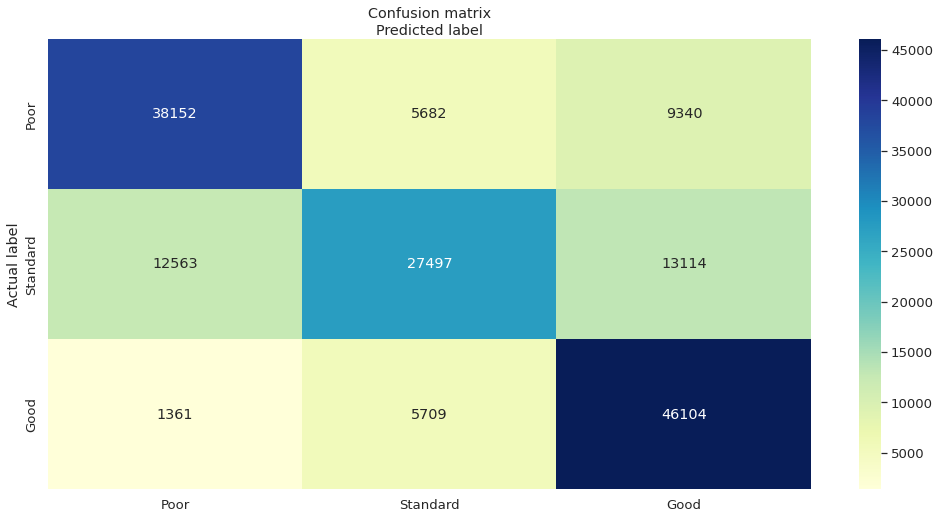

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target, y_predNBV1))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_predNBV1)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_predNBV1, target_names=class_names))

Evaluating NB with default parameters:
- The accuracy for NB default model is 70%.
- The precision for the 'Good' class appears to be the lowest with 67%, it also has the highest recall value of 87%. This means that there aren't too many false negatives in the 'Good' label which also means that there must have been lots of false positives to result in the small precision. We can verify this in the confusion matrix above where FP = 13114 + 9340 which is the highest FP value amongst all labels.

### 9.a.1 Naive Bayes Variation 1

- Number of bins changed to 10 from 5 


In [ ]:
sc = StandardScaler()
dataNBV2 = sc.fit_transform(data)

# Data encoding continous -> discrete for Naive Bayes
kbinsNBV2 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
dataNBV2 = kbinsNBV2.fit_transform(dataNBV2)

Accuracy: 0.700411228545279
              precision    recall  f1-score   support

        Poor       0.74      0.72      0.73     53174
    Standard       0.71      0.51      0.60     53174
        Good       0.66      0.87      0.75     53174

    accuracy                           0.70    159522
   macro avg       0.71      0.70      0.69    159522
weighted avg       0.71      0.70      0.69    159522



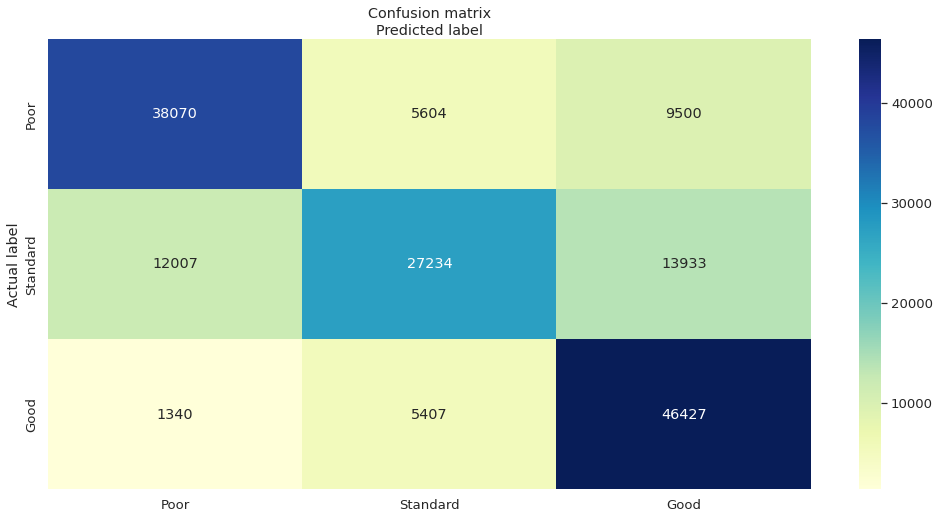

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predNBV2 = cross_val_predict(gnb, dataNBV2, target, cv = kFold)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target, y_predNBV2))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_predNBV2)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_predNBV2, target_names=class_names))

We see that the precision/recall values as well as the accuracy did not change much from the default Naive Bayes model.

### 9.a.2 Naive Bayes Variation 2

- Remove data scaling.

In [ ]:
# Data encoding continous -> discrete for Naive Bayes
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
dataNBV3 = kbins.fit_transform(data)

Accuracy: 0.7005491405574152
              precision    recall  f1-score   support

        Poor       0.73      0.72      0.72     53174
    Standard       0.71      0.52      0.60     53174
        Good       0.67      0.87      0.76     53174

    accuracy                           0.70    159522
   macro avg       0.70      0.70      0.69    159522
weighted avg       0.70      0.70      0.69    159522



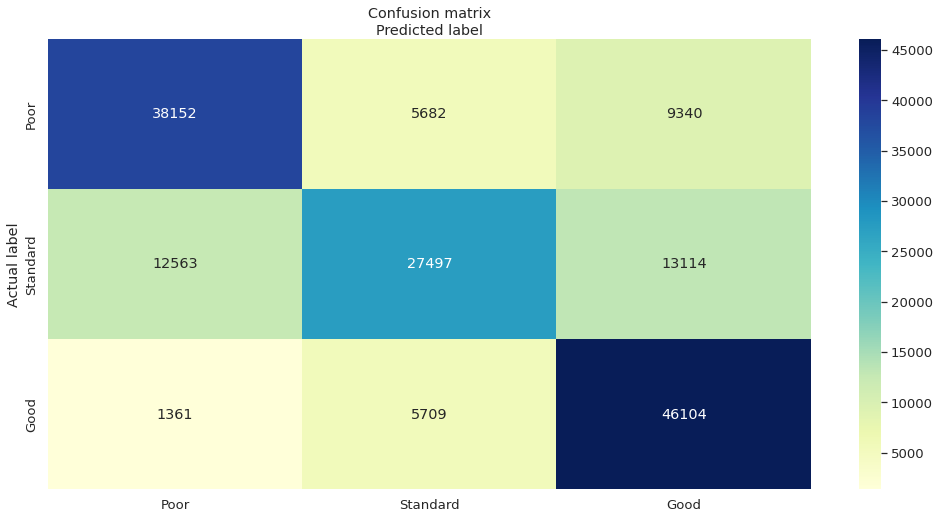

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predNBV3 = cross_val_predict(gnb, dataNBV3, target, cv = kFold)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target, y_predNBV3))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_predNBV3)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_predNBV3, target_names=class_names))

Similar to Variation 2, the precision/recall values and the accuracy remained almost unchanged.

## Logistic Regression Model

### 6.b Logistic Regression
Note: sklearn.linear_model documentation and course slides are used for the following information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

 - Logistic regression is normally designed for binary classification. Since we have multi-label classification (with 3 classes), we can already predict that it might not be a good model for this problem.
 - LogisticRegression of sklearn.linear_model package allows use to modify some important parameters that are used in its modeling.
    - penalty: norm of the penalty, l1, l2 for example (default=l2)
    - tol: stopping criteria that refers to the tolerance on the accuracy of the predictions, default is 0.0001.
    - max_iter: can be used as a stopping criteria so the solver iterates until converging to ‘tol’ (tolerance) or this number of iterations whichever one is reached first.
    - solver:`{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}`, default=’lbfgs’
      - algorithm to use in the optimization
    - random_state
      - used to shuffle the data when `solver == ‘sag’, ‘saga’ or ‘liblinear’`




### 7.b Logistic Regression with default parameters
- We first use the default penalty and solver. 
- random_state = 102 to shuffle the data
- max_iter = 1000 with defaul tol (0.0001)

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregV1 = LogisticRegression(max_iter = 100, tol = 0.0001, random_state=102, solver='liblinear')
y_predLRV1 = cross_val_predict(logregV1, data, target, cv = kFold)

### 8.b Evaluation of Logistic Regression with default parameters


Accuracy: 0.6774990283471872
              precision    recall  f1-score   support

        Poor       0.72      0.70      0.71     53174
    Standard       0.64      0.50      0.56     53174
        Good       0.67      0.83      0.74     53174

    accuracy                           0.68    159522
   macro avg       0.68      0.68      0.67    159522
weighted avg       0.68      0.68      0.67    159522



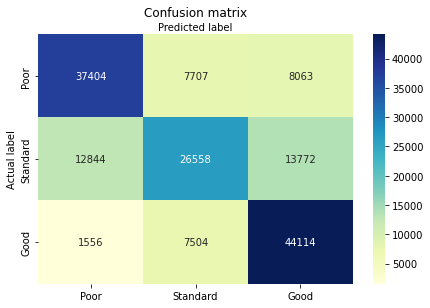

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target, y_predLRV1))


# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_predLRV1)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_predLRV1, target_names=class_names))

Evaluating LR with default parameters:
- The accuracy for Logistic Regression default model is slightly worse than the Naive Bayes models.
- The precision for the 'Standard' class appears to be the lowest with 64% which also correlates to its small recall value of 50%. This means that the false negatives are dominant in the 'Standard' label where the model predicted different labels when it should have predicted 'Standard'.
- As mentioned earlier, LR is used for binary classification hence it was expected for this model to have worse performance on a multi-label classification problem that we have here.

### 9.b.1 Logistic Regression - Variation 1
- We'll experiment with solver='newton-cg' while keeping the other parameters constant

Training LR Variation 1:

Note: Training and testing happen in the same line in cross-validation but we put the evaluation code in testing and use evaluation as a chance to do an analysis on the results.

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logregV2 = LogisticRegression(max_iter = 100, tol = 0.0001, random_state=102, solver='newton-cg')
y_predLRV2 = cross_val_predict(logregV2, data, target, cv = kFold)

Testing LR Variation 1:

Accuracy: 0.7031569313323555
              precision    recall  f1-score   support

        Poor       0.74      0.67      0.70     53174
    Standard       0.66      0.59      0.62     53174
        Good       0.71      0.85      0.77     53174

    accuracy                           0.70    159522
   macro avg       0.70      0.70      0.70    159522
weighted avg       0.70      0.70      0.70    159522



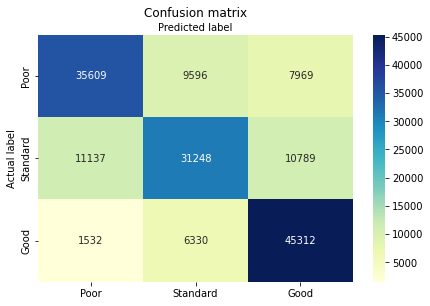

In [ ]:
print("Accuracy:",metrics.accuracy_score(target, y_predLRV2))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_predLRV2)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_predLRV2, target_names=class_names))

Evaluating LR Variation 1:
- The overall accuracy of the model increased to 70% with the 'newton-cg' solver. This is because Newton’s method uses a better quadratic function minimisation where it uses the quadratic approximation (first and second partial derivatives) which allows the gradient descent step to be more accurate.
- The per class precision increased as expected, 'Standard' still has the lowest precision and recall values which we can again see in the confusion matrix (where the false negatives are 11137 + 10789).

### 9.b.2 Logistic Regression - Variation 2
- We know that logistic regression is used for binary classification, so let's see if we only had 'Bad' and 'Good' values for credit score, the model accuracy would increase.
- We drop all rows that have credit score = 'Standard' and re-start the learning.


Training LR Variation 2:

In [ ]:
# Drop all rows that have Credit_Score = 'Standard' to reduce the problem to binary classification
credit_score_LRV3 = credit_score[credit_score['Credit_Score'] != 'Standard']

data_LRV3 = credit_score_LRV3 .drop(["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Credit_Score"], axis=1)
target_LRV3  = credit_score_LRV2["Credit_Score"].map(m)

#Preprocessing steps need to be re-run with the reduced dataset

# Converting string labels into numbers.
le = preprocessing.LabelEncoder()
data_LRV3["Occupation"] =le.fit_transform(credit_score_LRv2["Occupation"])
data_LRV3["Payment_Behaviour"]=le.fit_transform(credit_score_LRv2["Payment_Behaviour"])
data_LRV3["Credit_Mix"] = le.fit_transform(credit_score_LRv2["Credit_Mix"])
data_LRV3["Payment_of_Min_Amount"] = le.fit_transform(credit_score_LRv2["Payment_of_Min_Amount"])

# over sampling the data
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
data_LRv2, target_LRv2 = rus.fit_resample(data_LRV3, target_LRV3)


from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logregLRV3 = LogisticRegression(max_iter = 100, tol = 0.0001, random_state=102, solver='liblinear')

kFoldLRV3 = KFold(n_splits = 10, random_state = 0, shuffle = True)
y_predLRV3 = cross_val_predict(logreg, data_LRV3, target_LRV3, cv = kFoldLRV3)


Testing LR Variation 2:

Accuracy: 0.861887026691496
              precision    recall  f1-score   support

        Poor       0.92      0.80      0.85     28998
        Good       0.82      0.93      0.87     28998

    accuracy                           0.86     57996
   macro avg       0.87      0.86      0.86     57996
weighted avg       0.87      0.86      0.86     57996



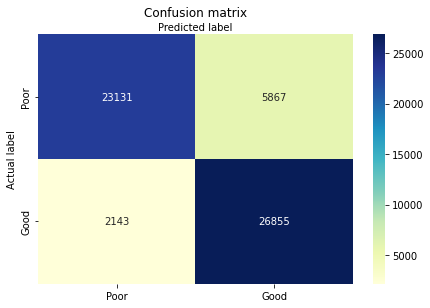

In [ ]:
print("Accuracy:",metrics.accuracy_score(target_LRV3, y_predLRV3))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target_LRV3, y_predLRV3)

class_names=['Poor','Good'] # name of classes (reduced to only 2 classes -> binary classification)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target_LRV3, y_predLRV3, target_names=class_names))

Evaluating LR Variation 2:
- As we reduced our target class number to 2 to turn it into a binary classification problem, we see that the Logistic Regression performance increased drastically. We expected this behaviour as we know that LR is designed for binary classifications.
- The overall accuracy went up to 86% which makes it a fairly good model.
- The recall values also went up as the number of false negatives decreased as seen in the confusion matrix (yellow/green cells).
- This model was just an experiment to show the intended use of LR, but as it required modification on our initial multi-label classification problem we will not take into account this model's results when we do the model comparison in Step 10.

## Multi-Layer Perceptron

### 6.c Multi-Layer Perceptron Model

Note: sklearn.linear_model documentation and course slides are used for the following information: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- Multi-layer perceptron is used in neural networks which allow the learning and prediction of complex models including multi-class classification problems which is what we have here in the case of classifying the credit score under three classes. 

- MLPClassifier of sklearn.neural_network package allows use to modify some important parameters that are used in the modeling.
 - Activation function: 
    - activation`{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}`, default=’relu’
    - The activation function determines when a node in the hidden layer will transfer the wighted sum input to the output for the next node to recieve. 
 - Max Iterations:
    - can be used as a stopping criteria so the solver iterates until converging to ‘tol’ (tolerance) or this number of iterations whichever one is reached first.
 - Number of iterations without change: 
    - another stopping criteria, the solver stops when it has done the numbe of iterations without any weight updates.
 - Tolerance
    - stopping criteria that refers to the tolerance on the accuracy of the predictions, default is 0.0001.
 - Hidden Layer Sizes
    - specifies the amount of hidden layers in the neural network as well as the number of nodes in each layer.

### 7.c Multi-Layer Perceptron with default parameters
- We first look at the default 'relu' function.
- We also set the max_iterations to 1000 to make sure it does enough iterations until converging to the default tolerance.
- We keep the default solver = 'adam'

In [ ]:
sc = StandardScaler()
dataMLP_default = sc.fit_transform(data)

from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier( max_iter = 1000, activation = 'relu',
                        solver = 'adam')

y_predMLP_default = cross_val_predict(mlp_clf, dataMLP_default, target, cv = kFold)

### 8.c Evaluation of Multi-Layer Perceptron with default parameters

Accuracy: 0.77
              precision    recall  f1-score   support

        Poor       0.78      0.78      0.78     53174
    Standard       0.74      0.65      0.69     53174
        Good       0.78      0.88      0.83     53174

    accuracy                           0.77    159522
   macro avg       0.77      0.77      0.77    159522
weighted avg       0.77      0.77      0.77    159522



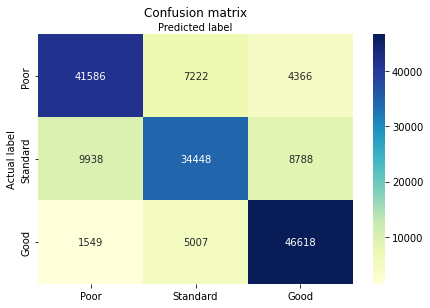

In [ ]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(target, y_predMLP_default)))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_predMLP_default)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_predMLP_default, target_names=class_names))

Evaluating MLP Default Version:
- 77% overall accuracy, better than Naive Bayes and Logistic Regression models studied so far. 
- The recall value tells us how complete the results are, meaning the proportion of true positives to all positives (false negative + true positive). We see that recall for Standard is the lowest, this is because if we look at the confusion matrix, we see that in the middle row Poor and Good columns has the highest values amoongst the cells that show the faulty classification(celss in yellow/green). These are false negative values for the 'Standard' class and since this value is very high, the recall value is therefore small (denominator in the recall formula).
- Precision values for each class is close to each other, over sampling is what causes this behaviour. As we over sample the dataset using SMOTE library, the number of data points for each class (poor,standard,good) become more equalized. This way, the model can do equal training for each class. 

### 9.c.1 Multi-Layer Perceptron Variation 1
- We start with a small number of hidden layers (5,5) which means there are 2 hidden layers of 5 nodes each.
- Set n_iter_no_change = 20
- Use default activation and solver

Training MLP Variaition 1:

In [ ]:
sc = StandardScaler()
dataMLP_v1 = sc.fit_transform(data)

from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,5), n_iter_no_change = 20,
                        max_iter = 1000, activation = 'relu',
                        solver = 'adam')

y_predMLPV1 = cross_val_predict(mlp_clf, dataMLP_v1, target, cv = kFold)

Testing MLP Variation 1:

Accuracy: 0.74
              precision    recall  f1-score   support

        Poor       0.74      0.77      0.76     53174
    Standard       0.75      0.58      0.66     53174
        Good       0.73      0.87      0.79     53174

    accuracy                           0.74    159522
   macro avg       0.74      0.74      0.73    159522
weighted avg       0.74      0.74      0.73    159522



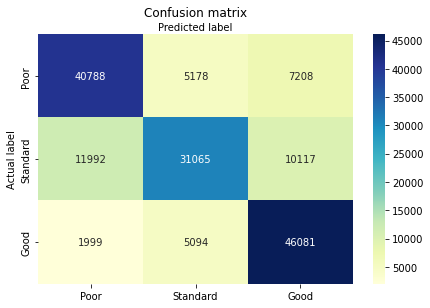

In [ ]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(target, y_predMLPV1)))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_predMLPV1)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_predMLPV1, target_names=class_names))

Evaluating MLP Variation 1:
- As the number of hidden layers is increased (2 hidden layers) and the number of nodes in each layer (5 nodes/hidden layer) decreased from default (one hiddent layer of 100 nodes) we see that the accuracy decreased to 74%.
- Precision values for each class is again close due to sampling.
- Again, lowest recall ratio belongs to the 'Standard' class and highest to the 'Good' class.

### 9.c.2 Multi-Layer Perceptron Variation 2
- We keep the default 'relu' activation function.
- We also set the max_iterations to 1000 and n_iter_no_change to 20 which means that if there are no more changes in the weights after 20 iterations, the learning stops. 
- Tol is kept at 0.0001
- Finally for the hidden layers, we will start with small values. 3 layers of 20,15,10 nodes in each later. We picked 20 to be close to the number of features we have which is 22.

Training MLP Variation 2

In [ ]:
sc = StandardScaler()
dataMLP_v2 = sc.fit_transform(data)

from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,15,10), n_iter_no_change = 20,
                        max_iter = 1000, activation = 'relu',
                        solver = 'adam')

y_predMLPV2 = cross_val_predict(mlp_clf, dataMLP_v2, target, cv = kFold)

Testing MLP Variation 2

Accuracy: 0.76
              precision    recall  f1-score   support

        Poor       0.77      0.78      0.78     53174
    Standard       0.76      0.60      0.67     53174
        Good       0.75      0.88      0.81     53174

    accuracy                           0.76    159522
   macro avg       0.76      0.76      0.75    159522
weighted avg       0.76      0.76      0.75    159522



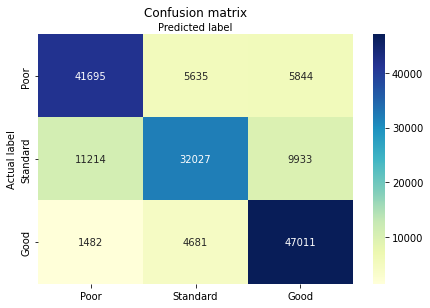

In [ ]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(target, y_predMLPV2)))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_predMLPV2)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_predMLPV2, target_names=class_names))

Evaluate MLP Variation 2:
- The precision values for each credit score class are again very close in the range of 0.75-0.77, this means that the predictions were made fairly consistent.
- The recall value for 'Standard' is still smallest, although better compared to Variation 2 which means that false negatives have decreased in number.
- Finally, the accuracy is better ~76% with increased number of hidden layers.

## Random Forest Classifier
Following is learnt from: https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
- The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. The final prediction is based on the votes from different decision trees.
- Mainly used for classification and regression problems
- Extra model, mainly for experimentation purposes.

 Training Random Forest Classifier:

In [ ]:
sc = StandardScaler()
data_RF = sc.fit_transform(data)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)

y_pred = cross_val_predict(rfc, data_RF, target, cv = kFold)

Testing Random Forest:

Accuracy: 0.89
              precision    recall  f1-score   support

        Poor       0.88      0.94      0.91     53174
    Standard       0.91      0.78      0.84     53174
        Good       0.89      0.97      0.93     53174

    accuracy                           0.89    159522
   macro avg       0.90      0.89      0.89    159522
weighted avg       0.90      0.89      0.89    159522



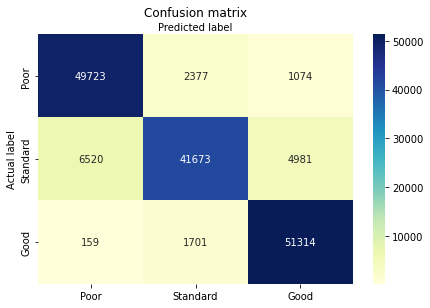

In [ ]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(target, y_pred)))

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(target, y_pred)

class_names=['Poor','Standard','Good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);
from sklearn.metrics import classification_report
print(classification_report(target, y_pred, target_names=class_names))

Evaluating Random Forest:
- With Random Forest Classifier, we achieved the highest accuracy values with an overall accuracy of 90%.
- The precision and recall values per label follow similar standings as the previous models where 'Standard' label has the lowest recall values while 'Good' has the highest recall. If we look at the matrix, we see that in 3rd row(corresponds to all data that have an actual label of 'Good'), there was a total of only (117+1708) false negatives which is lower than all other classes.
- Precision for the 'Standard' label is the highest which we can see in the confusion matrix in the 'Standard' column. Precision is calculated as (41687/(41687+2281+1708)) which equates to ~91%.

## 10. Conclusion

### 10.a

Comparison of Models Indivually:
    
1. Naive Bayes

  - When we compare the 3 variations of the Naive Bayes model with each other we can see that there is not much variation in the accuracy. This is due to fact that Naive Bayes is not affected by the change of parameters. In order have an affect on performance we can try better handling continous variables (formation of bins) and try to remove correlated feautres (features that point to same features which results in overestimation of these labels).
  - Looking closely at individual recall and precision values we see that; 
    - Poor label consistently has the best precision with average precision of 0.73, Good label has the worst precision with average precision of 0.67 and the Standard label sits between the other two labels with average precision of 0.71.
    - Good label consistently has the best recall with average recall of 0.85, standard label has the worst recall with average recall of 0.54 and the Poor label sits between the other two labels with average recall of 0.72.    
        
2. Logistic Regression

  - When we compare the 2 variations of the Logistic Regression model with each other we can see that there is an improvement in accuracy from 0.68 to 0.70. This is due to fact that Logistic Regression can be improved by hyper-parameter tuning. In order to have an impact on the performance we can try changing parameters such as number of iterations, tolerance and solver.
  - Looking closely at individual recall and precision values we see that; 
    - Poor label consistently has the best precision with average precision of 0.73, Good label has the worst precision with average precision of 0.67 and the Standard label sits between the other two labels with average precision of 0.69.
    - Good label consistently has the best recall with average recall of 0.84, standard label has the worst recall with average recall of 0.55 and the Poor label sits between the other two labels with average recall of 0.69.    
  
3. Multi-Layer Perceptron

  - When we compare the 3 variations of the Multi_layer Perceptron model with each other we can see that accuracy changes between variations. This is due to fact that Multi-Layer Persecptron can be improved by hyper-parameter tuning. In order to have an impact on the performance we can try changing parameters such as number of iterations, numder of neurons in hidden layers, number of iterations without a change on error and solver.
  - Looking closely at individual recall and precision values we see that; 
    - All labels have similar precision values over three variations. First variation has the highest precision (Poor and Good label 0.78, Standard Label 0.74)compared to other variations. Variation 1 has the lowest precisions (Poor Label 0.74, Standard Label 0.75 and Good Label 0.73) and variotion 2 sits between the other two variations
    - Good label consistently has the best recall with average recall of 0.88, standard label has the worst recall with average recall of 0.61 and the Poor label sits between the other two labels with average recall of 0.78.



### 10.b  

We will now look at the confusion matrices and precision/recall values for the best(MLP with default parameters) and worst(Logistic Regression with default parameters) accurate models.

![Confusion matrix of MLP Default](https://drive.google.com/uc?id=16dkzIiEMHaQYuxSUo0X0ZCk2swZhdEz2)
Confusion matrix of MLP with Default Parameters
```

credit scores = 159522

Poor credit scores = 53174
Standard credit scores = 53173
Good credit scores = 53174

TP Poor credit scores = 41586 (actually poor and predicted poor)
FP Poor credit scores = 9938 + 1549 = 11487 (actually standard or good but predicted poor)
TN Poor credit scores = 34448 + 46618 = 81066 (TP good + TP standard)
FN Poor credit scores = 7222 + 4366 = 11588 (actually poor predicted standard or good)

TP Standard credit scores = 34448 (actually standard and predicted standard)
FP Standard credit scores = 7222 + 50007 = 12229 (actually poor or good but predicted standard)
TN Standard credit scores = 41586 + 46618 = 88204 (TP good + TP poor)
FN Standard credit scores = 9938 + 8788 = 18726 (actually standard predicted poor or good)

TP Good credit scores = 46618 (actually good and predicted good)
FP Good credit scores = 8788 + 4366 = 13154 (actually standard or poor but predicted good)
TN Good credit scores = 41586 + 34448 = 76034 (TP standard + TP poor)
FN Good credit scores = 1549 + 5007 = 6556 (actually good predicted standard or poor)


Accuracy = (TN + TP)/(Poor + Standard + Good)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 = 2 * Precision * Recall / (Precision + Recall)

Poor Accuracy = (81066 + 41586) / (159522) = 0.77
Standard Accuracy = (88204 + 34448) / (159522) = 0.77
Good Accuracy = (76034 + 46618) / (159522) = 0.77



Poor Precision =  41586 / (41586 + 11487) = 0.78
Standard Precision =  34448 / (34448 + 12229) = 0.74
Good Precision =  46618 / (46618 + 13154) = 0.78

Poor Recall = 41586 / (41586 + 11588) = 0.78
Standard Recall = 34448 / (34448 + 18726) = 0.65
Good Recall = 46618 / (46618 + 6556) = 0.88


Poor F1 = 2 * 0.78 * 0.78 / (0.78 + 0.78) = 0.78
Standard F1 = 2 * 0.65 * 0.74 / (0.65 + 0.74) = 0.69
Good F1 = 2 * 0.78 * 0.88 / (0.78 + 0.88) = 0.83
```

![Confusion matrix of Logistic Regression Default](https://drive.google.com/uc?id=1ElYUYRPlW5DJZyNZtYwwOVr3x8KQXg71)

Confusion matrix of Logistic Regression with Default Parameters

Comparison of Models Together:

We can see that Poor labels precision and recall values don't change between variations. But we can see a significant difference between recall and precision values of Good and Standard labels.
<br><br>
Good Label Recall, Precision difference:

  - Good label has a relatively small number of false negatives but relatively large number false positives. This results in actual Good values being predicted as Good but relatively large portion actual Poor and Standard labels being predicted as Good as well.


Standard Label Recall, Precision difference:

  - Standard label has a relatively large number of false negatives (half of standard predictions are false negative) but relatively small number false positives. This results in actual Standard values being predicted as Good and Poor labels. Standard label also has relatively high false positives compared to false positive numbers of other labels.

With these conclusions we can infer models used are best at identifying Good labels and worst at identifying Standard Labels.
We can see that best model for this dataset is Multi-Layer Perceptron with maximum accuracy of 0.78 and worst model is Logistic Regression with maximum accuracy of 0.70

# References

*   Credit Score Classification Clean Data. (2022b, October 14). Kaggle. https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification?resource=download
* sklearn.linear_model.LogisticRegression. (n.d.). Scikit-learn. Retrieved November 1, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* sklearn.neural_network.MLPClassifier. (n.d.). Scikit-learn. Retrieved November 1, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
* 1.9. Naive Bayes. (n.d.). Scikit-learn. Retrieved November 1, 2022, from https://scikit-learn.org/stable/modules/naive_bayes.html
* 3.1. Cross-validation: evaluating estimator performance. (n.d.). Scikit-learn. Retrieved November 1, 2022, from https://scikit-learn.org/stable/modules/cross_validation.html
* Tokuç, A. A. (2021, April 24). How to improve naive Bayes classification performance? Baeldung on Computer Science. Retrieved November 1, 2022, from https://www.baeldung.com/cs/naive-bayes-classification-performance 
*   Controlling figure aesthetics — seaborn 0.12.1 documentation. (n.d.-b). Retrieved November 1, 2022, from https://seaborn.pydata.org/tutorial/aesthetics.html
* Analyzing Credit Score Data! (2022, October 26). Kaggle. https://www.kaggle.com/code/mohammadsohal/analyzing-credit-score-data?scriptVersionId=109198946
* https://www.kaggle.com/code/mohammadsohal/analyzing-credit-score-data?scriptVersionId=109198946&cellId=38
* Google Colaboratory. (n.d.). Retrieved November 1, 2022, from https://colab.research.google.com/drive/14o0S-2Pp9RpovgI9TdkgbkWl8W18TVF3
* 💵Can I borrow money from the banks🏦? EDA+LGBM. (2022, October 19). Kaggle. https://www.kaggle.com/code/aieducation/can-i-borrow-money-from-the-banks-eda-lgbm?scriptVersionId=108537516
* 💵Can I borrow money from the banks🏦? EDA+LGBM. (2022b, October 19). Kaggle. https://www.kaggle.com/code/aieducation/can-i-borrow-money-from-the-banks-eda-lgbm?scriptVersionId=108537516



